In [1]:
from datetime import date, timedelta

import polars as pl

import synthx as sx

### time => int

In [2]:
df = sx.sample(
    n_units=20,
    n_time=50,
    n_observed_covariates=10,
    n_unobserved_covariates=3,
    intervention_units=1,
    intervention_time=40,
    intervention_effect=1,
    scale=2,
    seed=42,
)
df.head()

unit,time,y,covariate_1,covariate_2,covariate_3,covariate_4,covariate_5,covariate_6,covariate_7,covariate_8,covariate_9,covariate_10
i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
1,1,15.434309,0.747609,0.50272,0.232213,0.899575,0.383891,0.543553,0.906472,0.624238,0.116898,0.939832
1,2,15.337563,0.747609,0.50272,0.232213,0.899575,0.383891,0.543553,0.906472,0.624238,0.116898,0.939832
1,3,15.624739,0.747609,0.50272,0.232213,0.899575,0.383891,0.543553,0.906472,0.624238,0.116898,0.939832
1,4,14.38771,0.747609,0.50272,0.232213,0.899575,0.383891,0.543553,0.906472,0.624238,0.116898,0.939832
1,5,15.247709,0.747609,0.50272,0.232213,0.899575,0.383891,0.543553,0.906472,0.624238,0.116898,0.939832


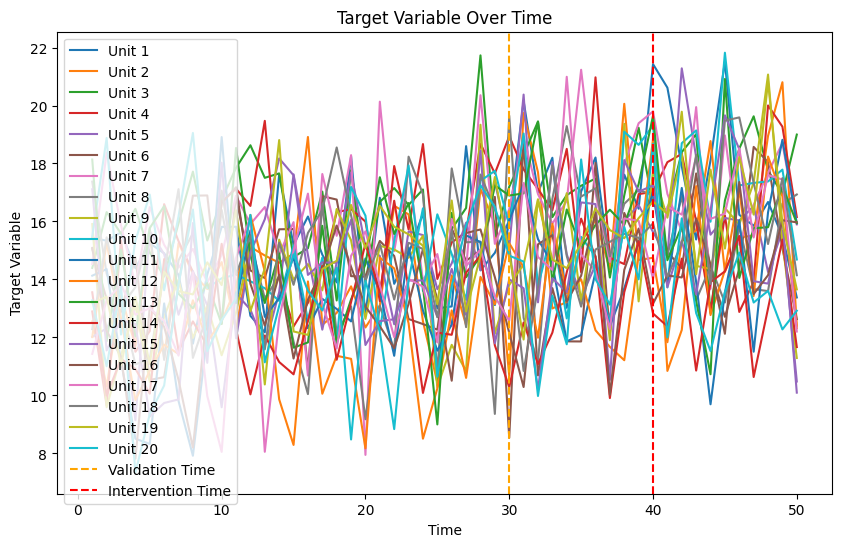

In [3]:
dataset = sx.Dataset(
    df,
    unit_column = 'unit',
    time_column = 'time',
    y_column = 'y',
    covariate_columns = ['covariate_1', 'covariate_2', 'covariate_3'],
    intervention_units=1,
    intervention_time=40,
    validation_time=30,
)
dataset.plot()

### time => date

In [4]:
df = sx.sample(
    n_units=20,
    n_time=50,
    n_observed_covariates=3,
    n_unobserved_covariates=10,
    intervention_units=1,
    intervention_time=40,
    intervention_effect=1,
    scale=2,
    seed=42,
)
df = df.with_columns((pl.datetime(2022,1,1) + pl.duration(weeks='time')).cast(pl.Date).alias('time'))
df.head()

unit,time,y,covariate_1,covariate_2,covariate_3
i64,date,f64,f64,f64,f64
1,2022-01-08,17.631617,0.747609,0.50272,0.232213
1,2022-01-15,16.854789,0.747609,0.50272,0.232213
1,2022-01-22,15.131466,0.747609,0.50272,0.232213
1,2022-01-29,17.435862,0.747609,0.50272,0.232213
1,2022-02-05,15.586094,0.747609,0.50272,0.232213


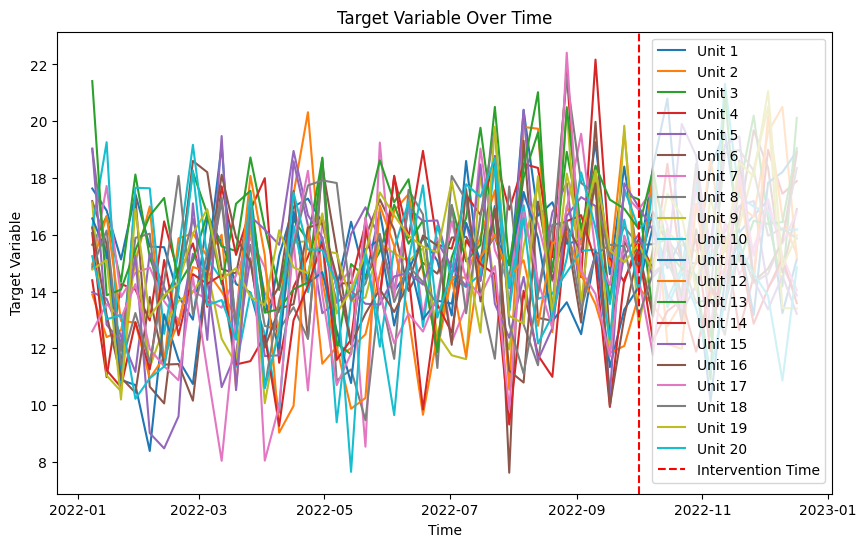

In [5]:
dataset = sx.Dataset(
    df,
    unit_column = 'unit',
    time_column = 'time',
    y_column = 'y',
    covariate_columns = ['covariate_1', 'covariate_2', 'covariate_3'],
    intervention_units=1,
    intervention_time=date(2022, 10, 1),
)
dataset.plot()

### filtering based on lift and moe

In [6]:
df = sx.sample(
    n_units=20,
    n_time=50,
    n_observed_covariates=3,
    n_unobserved_covariates=10,
    intervention_units=[1, 2, 3],
    intervention_time=40,
    intervention_effect=1,
    scale=2,
    seed=42,
)
df = df.with_columns((pl.datetime(2022,1,1) + pl.duration(weeks='time')).cast(pl.Date).alias('time'))

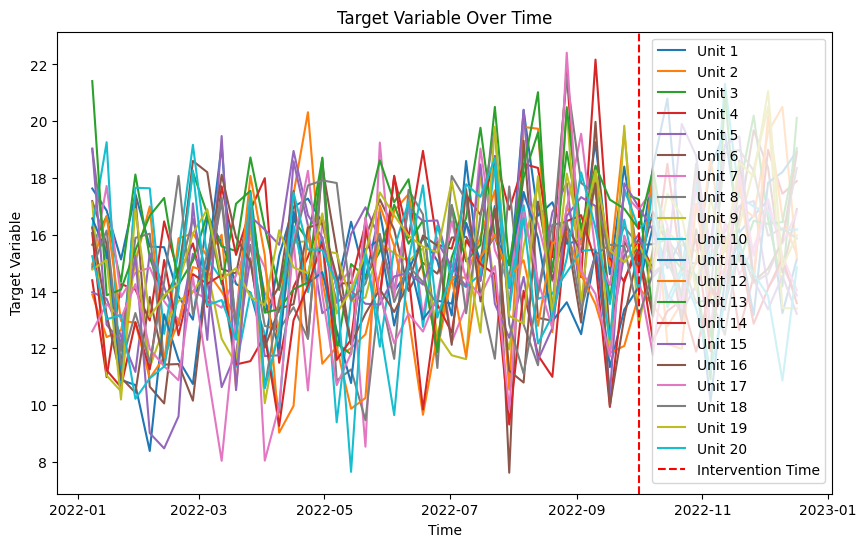

In [7]:
dataset = sx.Dataset(
    df,
    unit_column = 'unit',
    time_column = 'time',
    y_column = 'y',
    covariate_columns = ['covariate_1', 'covariate_2', 'covariate_3'],
    intervention_units=[1, 2, 3],
    intervention_time=date(2022, 10, 1),
)
dataset.plot()

In [8]:
dataset = dataset.filtered_by_lift_and_moe(lift_threshold=1.5, moe_threshold=3, write_progress=True)

unit 1 kept. lift: 0.756 ~ 1.298, moe: -2.031 ~ 2.481                                                                                                                                                                 
unit 2 kept. lift: 0.688 ~ 1.338, moe: -1.844 ~ 1.996                                                                                                                                                                 
unit 3 kept. lift: 0.738 ~ 1.254, moe: -2.053 ~ 1.989                                                                                                                                                                 
unit 4 kept. lift: 0.692 ~ 1.396, moe: -2.112 ~ 2.715                                                                                                                                                                 
unit 5 kept. lift: 0.704 ~ 1.352, moe: -2.035 ~ 2.422                                                                                       

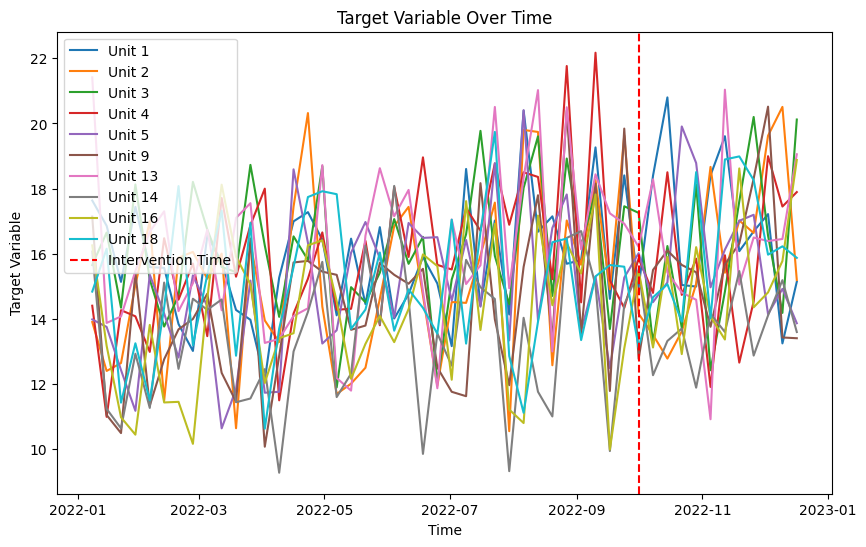

In [9]:
dataset.plot()